# Cleaning the data

In [37]:
import Dathoven

In [2]:
import glob, os
import numpy as np
from matplotlib import pyplot as plt
from music21 import converter, corpus, instrument, midi, note, chord, pitch, stream,interval, duration

In [3]:
midi_test_path = 'data/examples/silent_night_easy.mid'

In [4]:
Dathoven.from_midi_to_array_of_intervals_with_time(midi_test_path)

[{'relative_offset': 1.5, 'interval': 2.0, 'duration': 0.5},
 {'relative_offset': 0.5, 'interval': -2.0, 'duration': 1.0},
 {'relative_offset': 4.0, 'interval': 0.0, 'duration': 1.5},
 {'relative_offset': 1.5, 'interval': 2.0, 'duration': 0.5},
 {'relative_offset': 0.5, 'interval': -2.0, 'duration': 1.0},
 {'relative_offset': 1.0, 'interval': -3.0, 'duration': 2.75},
 {'relative_offset': 1.0, 'interval': -5.0, 'duration': 1.0},
 {'relative_offset': 1.0, 'interval': -2.0, 'duration': 1.0},
 {'relative_offset': 1.0, 'interval': 17.0, 'duration': 2.0},
 {'relative_offset': 2.0, 'interval': 0.0, 'duration': 1.0},
 {'relative_offset': 1.0, 'interval': -3.0, 'duration': 3.0},
 {'relative_offset': 2.0, 'interval': -16.0, 'duration': 1.0},
 {'relative_offset': 1.0, 'interval': 17.0, 'duration': 2.0},
 {'relative_offset': 2.0, 'interval': 0.0, 'duration': 1.0},
 {'relative_offset': 1.0, 'interval': -5.0, 'duration': 2.75},
 {'relative_offset': 3.0, 'interval': 2.0, 'duration': 2.0},
 {'relative

In [5]:
silent_night_deltas = Dathoven.from_midi_to_array_of_intervals_with_time(midi_test_path)

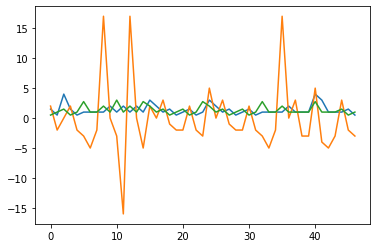

In [6]:
plt.plot(range(0, len(silent_night_deltas)), [x['relative_offset'] for x in silent_night_deltas])
plt.plot(range(0, len(silent_night_deltas)), [x['interval'] for x in silent_night_deltas])
plt.plot(range(0, len(silent_night_deltas)), [x['duration'] for x in silent_night_deltas]);

In [7]:
#Test
Dathoven.from_intervals_with_time_to_midi(60, Dathoven.from_midi_to_array_of_intervals_with_time('data/examples/silent_night_easy.mid'),'test_intervals_with_time_silent_night.mid')

In [9]:
Dathoven.from_midi_to_array_of_intervals_with_time('data/examples/silent_night_easy.mid')

[{'relative_offset': 1.5, 'interval': 2.0, 'duration': 0.5},
 {'relative_offset': 0.5, 'interval': -2.0, 'duration': 1.0},
 {'relative_offset': 4.0, 'interval': 0.0, 'duration': 1.5},
 {'relative_offset': 1.5, 'interval': 2.0, 'duration': 0.5},
 {'relative_offset': 0.5, 'interval': -2.0, 'duration': 1.0},
 {'relative_offset': 1.0, 'interval': -3.0, 'duration': 2.75},
 {'relative_offset': 1.0, 'interval': -5.0, 'duration': 1.0},
 {'relative_offset': 1.0, 'interval': -2.0, 'duration': 1.0},
 {'relative_offset': 1.0, 'interval': 17.0, 'duration': 2.0},
 {'relative_offset': 2.0, 'interval': 0.0, 'duration': 1.0},
 {'relative_offset': 1.0, 'interval': -3.0, 'duration': 3.0},
 {'relative_offset': 2.0, 'interval': -16.0, 'duration': 1.0},
 {'relative_offset': 1.0, 'interval': 17.0, 'duration': 2.0},
 {'relative_offset': 2.0, 'interval': 0.0, 'duration': 1.0},
 {'relative_offset': 1.0, 'interval': -5.0, 'duration': 2.75},
 {'relative_offset': 3.0, 'interval': 2.0, 'duration': 2.0},
 {'relative

In [11]:
 # Load back from the pickle file.
import pickle

songs = pickle.load( open( "./songs.p", "rb" ) )

In [15]:
import pandas as pd

In [18]:
len(songs)

424

In [24]:
all_elements=[]
for i in range(len(songs)):
    song = songs[i]
    for element in song:
        element['song N'] = i
        all_elements.append(element)


In [25]:
len(all_elements)

72572

In [27]:
songs_df = pd.DataFrame(all_elements)
songs_df

,relative_offset,interval,duration,song N
0,0.5,0.0,1/3,0
1,0.5,0.0,1/3,0
2,0.5,0.0,1/3,0
3,0.5,0.0,1/3,0
4,0.5,0.0,1/3,0
...,...,...,...,...
72567,1.0,0.0,0.5,423
72568,1.5,0.0,0.5,423
72569,0.5,0.0,0.5,423
72570,0.5,0.0,0.5,423


In [38]:
songs_df[songs_df['duration'] == 0]

,relative_offset,interval,duration,song N
13,0.75,0.0,0.0,0
14,0.25,0.0,0.0,0
15,0.25,0.0,0.0,0
46,0.75,0.0,0.0,0
47,0.25,0.0,0.0,0
...,...,...,...,...
71433,0.25,-24.0,0.0,418
71441,0.5,-34.0,0.0,418
71453,0.25,-22.0,0.0,418
71473,0.25,-24.0,0.0,418


In [36]:
songs_df[abs(songs_df['interval']) > 50]

,relative_offset,interval,duration,song N
986,0.5,-51.0,1.0,3
1001,0.5,-51.0,1.0,3
3102,0.5,52.0,0.5,20
3108,0.5,-53.0,0.5,20
3109,0.5,53.0,0.5,20
...,...,...,...,...
70688,0.5,-54.0,0.5,415
70691,0.5,53.0,2.0,415
70692,1.0,-51.0,0.5,415
70732,1.0,52.0,0.5,415
